# Four-strokes in Europe: Analyzing Eurostat vehicle dataset

### importing necessary libraries

In [1]:
import pandas  as pd
import numpy   as np
import os           
import datetime  

import seaborn as sns
import matplotlib.pyplot as plt


import scipy

%matplotlib notebook
%matplotlib inline


# Pick datasets

## source of datasets : https://ec.europa.eu/eurostat/data/database

### New car registration by engine types and sizes

In [2]:
vehicle_reg = pd.read_excel(r'road_eqr_carmot.tsv.xlsx', index_col=0)  

### GDP dataset

In [3]:
countries_nama = pd.read_excel(r'nama_10_gdp.tsv.xlsx', index_col=0) 

In [4]:
vehicle_reg.head()

,mot_nrg,engine,geo\time,2019,2018,2017,2016,2015,2014,2013,...,1986,1985,1984,1983,1982,1981,1980,1979,1975,1970
unit,,,,,,,,,,,,,,,,,,,,,
NR,DIE,CC1400-1999,AT,:,121008,149980,162344,151225,142434,148732,...,:,:,:,:,:,:,:,:,:,:
NR,DIE,CC1400-1999,BE,164802,178651,231725,251173,263051,255701,265841,...,:,:,:,:,:,:,:,:,:,:
NR,DIE,CC1400-1999,CH,68300,69600,85800,93000,90700,78300,79800,...,:,:,:,:,:,:,:,:,:,:
NR,DIE,CC1400-1999,CY,10267,10891,9346,6650,4454,3414,1354,...,:,:,:,:,:,:,:,:,:,:
NR,DIE,CC1400-1999,DE,968625,865244,1019364,1170332,1146031,1073048,1027556,...,:,:,:,:,:,:,:,:,:,:


In [5]:
countries_nama.head()

,na_item,geo\time,2021,2020,2019,2018,2017,2016,2015,2014,...,1984,1983,1982,1981,1980,1979,1978,1977,1976,1975
unit,,,,,,,,,,,,,,,,,,,,,
CLV05_MEUR,B1G,AT,:,258371.1,277157.2,273213.7,266016.9,259996.4,255017.1,252879.7,...,:,:,:,:,:,:,:,:,:,:
CLV05_MEUR,B1G,BA,:,10523.9,10821.3,10515,10135.1,9811.3,9511.2,9224.4,...,:,:,:,:,:,:,:,:,:,:
CLV05_MEUR,B1G,BE,:,324188.6 p,342263.6,334746.8,328736.7,323677.5,320657.4,313684.3,...,:,:,:,:,:,:,:,:,:,:
CLV05_MEUR,B1G,BG,:,28387.3,29721.6,28654.5,27691.2,26806.7,26129.3,25373.6,...,:,:,:,:,:,:,:,:,:,:
CLV05_MEUR,B1G,CH,:,424629.5 p,434166.1 p,428690.5,415990.3,409449.3,401210.1,394744.2,...,:,:,:,:,:,:,:,:,:,:


# Questions

## 1) How new car registration evolves over years and are there any observable trend at different countries?
## 2) Does Europe says goodbye to diesel engines?
## 3) Which engine sizes are the most popular for both diesel and petrol cars?
## 4) How the number of new cars correlates to GDP?

# Prepare data

In [6]:
def preproc_cleaning(character,df,letters, dataColStart):
    """
    Set dataframe columns to string. 
    Replace ':' character with NaN.
    Replace letters in numeric cells with empty space.
    Set specific column values to numeric type.

    Parameters
    ----------
    character : string
        To be replaced to Nan.
    df : DataFrame
        To be processed.
    letters: string list
        To be replaced with empty space.
    dataColStart: The index of the column from which cell values should be numeric.    

    Returns
    -------
    DataFrame
        
    """
    
    df.columns = df.columns.astype(str)    
    df = df.replace(character,np.NaN,regex=True)
    df = df.replace(letters,' ',regex=True)
    df[df.iloc[:,dataColStart:].columns] = df[df.iloc[:,dataColStart:].columns].apply(pd.to_numeric, errors='coerce')
    
    return df

In [7]:
letters=['a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u','v','w','x','y','z']

In [8]:
vehicle_reg = preproc_cleaning(':',vehicle_reg,letters, 3)
countries_nama = preproc_cleaning(':',countries_nama,letters, 2)

### get unique country names, motor types and engine sizes and save them in a list

In [9]:
countries=vehicle_reg['geo\\time'].unique().tolist()
motor_nrgs=vehicle_reg['mot_nrg'].unique().tolist()
engines=vehicle_reg['engine'].unique().tolist()

### select all engine types and sizes for each country. Columns showing years show the number of newly registered cars

In [10]:
veh_allEngine_allNrg=vehicle_reg[(vehicle_reg['mot_nrg']=='TOTAL') & (vehicle_reg['engine']=='TOTAL')]

### drop columns and rows having only NaN

In [11]:
veh_allEngine_allNrg_droped=veh_allEngine_allNrg.dropna(axis=1, how='all')

In [12]:
veh_allEngine_allNrg_droped=veh_allEngine_allNrg_droped.dropna(axis=0, how='all')

### set country names to index

In [13]:
veh_allEngine_allNrg_droped=veh_allEngine_allNrg_droped.set_index('geo\\time')

# Analysis and visualisation

## show heatmaps for 1st question: How new car registration evolves over years and are there any observable trend at different countries?

Text(0.5, 1.0, 'New registration of passenger cars -- all engine sizes & all fuel types')

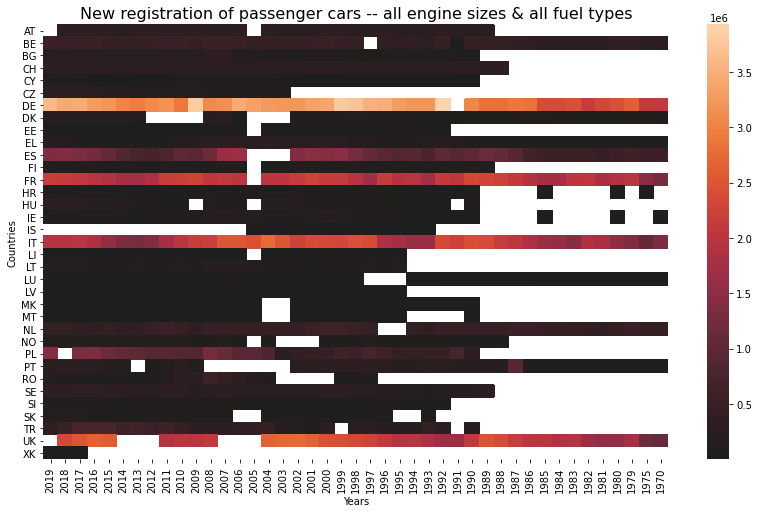

In [14]:
plt.figure(figsize=(14, 8))
sns.heatmap(data=veh_allEngine_allNrg_droped.iloc[:,2:], annot=False, center=0, linewidths=.0)
plt.xlabel('Years')
plt.ylabel('Countries')
plt.title('New registration of passenger cars -- all engine sizes & all fuel types', fontsize=16)

Text(0.5, 1.0, 'New registration of passenger cars -- all engine sizes & all fuel types \n Normalized by max in rows')

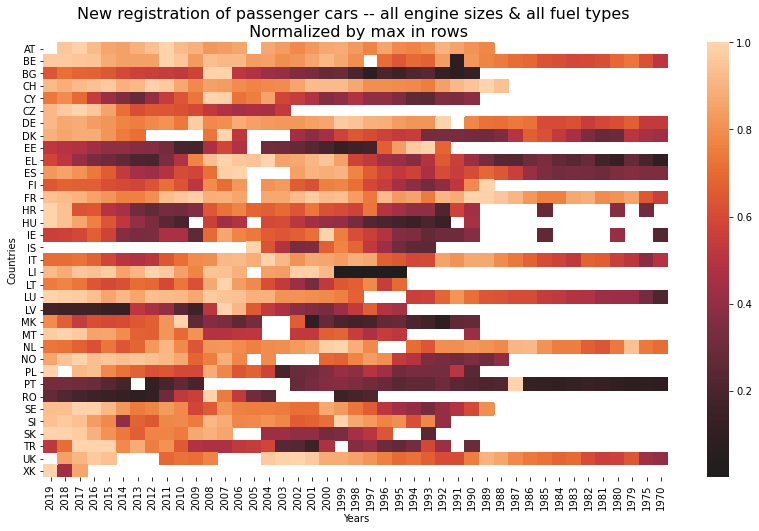

In [15]:
plt.figure(figsize=(14, 8))
sns.heatmap(data=veh_allEngine_allNrg_droped.iloc[:,2:].div(veh_allEngine_allNrg_droped.iloc[:,2:].max(axis=1), axis=0), annot=False, center=0, linewidths=.0)
plt.xlabel('Years')
plt.ylabel('Countries')
plt.title('New registration of passenger cars -- all engine sizes & all fuel types \n Normalized by max in rows', fontsize=16)

In [16]:
veh_allEngine_diesel=vehicle_reg[(vehicle_reg['mot_nrg']=='DIE') & (vehicle_reg['engine']=='TOTAL')]
veh_allEngine_diesel_dropped=veh_allEngine_diesel.dropna(axis=1, how='all')
veh_allEngine_diesel_dropped=veh_allEngine_diesel_dropped.dropna(axis=0, how='all')
veh_allEngine_diesel_dropped=veh_allEngine_diesel_dropped.set_index('geo\\time')

Text(0.5, 1.0, 'New registration of passenger cars -- all engine sizes & diesel')

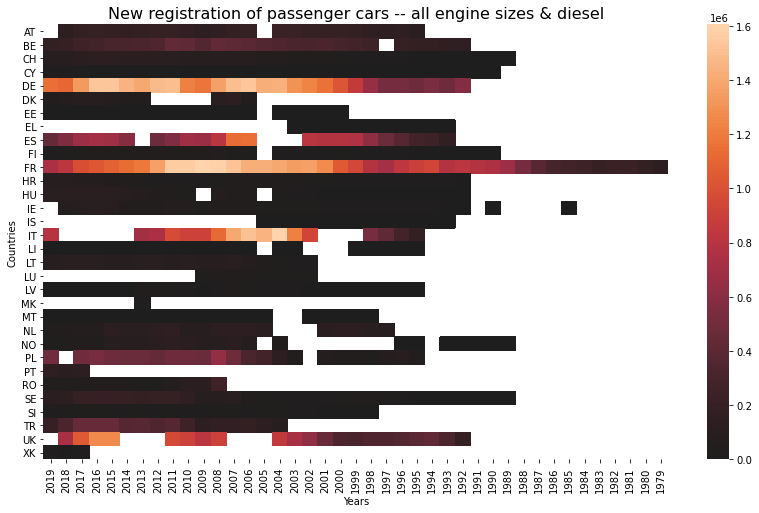

In [17]:
plt.figure(figsize=(14, 8))
sns.heatmap(data=veh_allEngine_diesel_dropped.iloc[:,2:], annot=False, center=0, linewidths=.0)
plt.xlabel('Years')
plt.ylabel('Countries')
plt.title('New registration of passenger cars -- all engine sizes & diesel', fontsize=16)

Text(0.5, 1.0, 'New registration of passenger cars -- all engine sizes & diesel \n Normalized by max in rows')

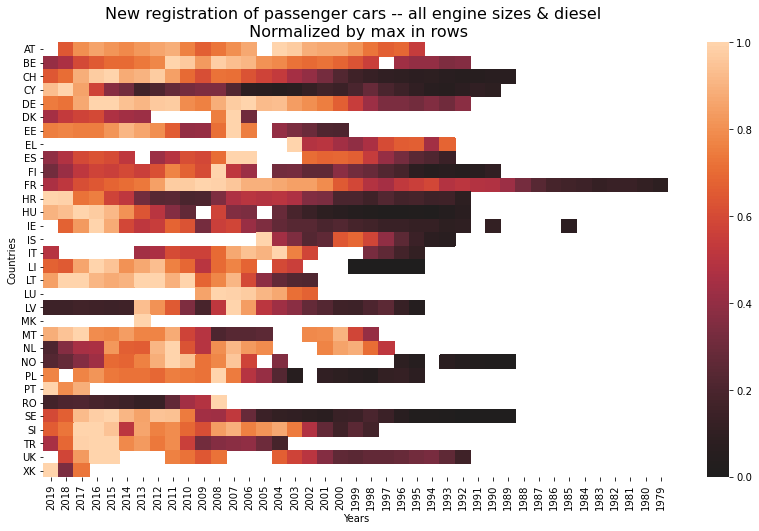

In [18]:
plt.figure(figsize=(14, 8))
sns.heatmap(data=veh_allEngine_diesel_dropped.iloc[:,2:].div(veh_allEngine_diesel_dropped.iloc[:,2:].max(axis=1), axis=0), annot=False, center=0, linewidths=.0)
plt.xlabel('Years')
plt.ylabel('Countries')
plt.title('New registration of passenger cars -- all engine sizes & diesel \n Normalized by max in rows', fontsize=16)

In [19]:
veh_allEngine_petrol=vehicle_reg[(vehicle_reg['mot_nrg']=='PET') & (vehicle_reg['engine']=='TOTAL')]
veh_allEngine_petrol_dropped=veh_allEngine_petrol.dropna(axis=1, how='all')
veh_allEngine_petrol_dropped=veh_allEngine_petrol_dropped.dropna(axis=0, how='all')
veh_allEngine_petrol_dropped=veh_allEngine_petrol_dropped.set_index('geo\\time')

Text(0.5, 1.0, 'New registration of passenger cars -- all engine sizes & petrol')

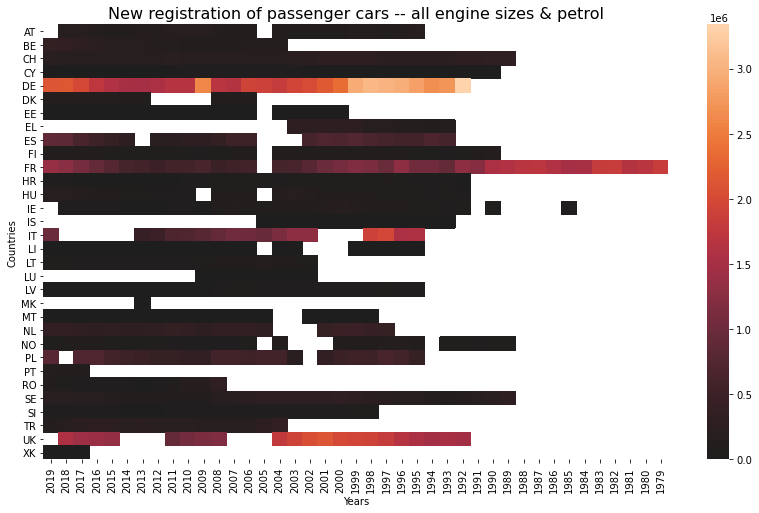

In [20]:
plt.figure(figsize=(14, 8))
sns.heatmap(data=veh_allEngine_petrol_dropped.iloc[:,2:], annot=False, center=0, linewidths=.0)
plt.xlabel('Years')
plt.ylabel('Countries')
plt.title('New registration of passenger cars -- all engine sizes & petrol', fontsize=16)

Text(0.5, 1.0, 'New registration of passenger cars -- all engine sizes & petrol \n Normalized by max in rows')

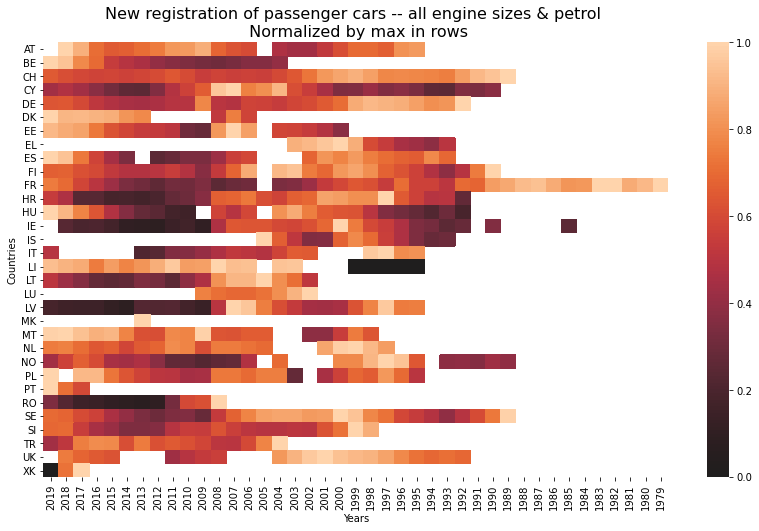

In [21]:
plt.figure(figsize=(14, 8))
sns.heatmap(data=veh_allEngine_petrol_dropped.iloc[:,2:].div(veh_allEngine_petrol_dropped.iloc[:,2:].max(axis=1), axis=0), annot=False, center=0, linewidths=.0)
plt.xlabel('Years')
plt.ylabel('Countries')
plt.title('New registration of passenger cars -- all engine sizes & petrol \n Normalized by max in rows', fontsize=16)

## show heatmap for 2nd question: Does Europe says goodbye to diesel engines?
### petrol/diesel ratio was calculated by dividing the petrol car dataframe with the diesel car dataframe 

In [22]:
np.seterr(divide='ignore', invalid='ignore')

veh_allEngine_petrol_diesel_ratio_dropped=veh_allEngine_petrol_dropped.iloc[:,2:]/veh_allEngine_diesel_dropped.iloc[:,2:]

Text(0.5, 1.0, 'New registration of passenger cars -- petrol-diesel ratio')

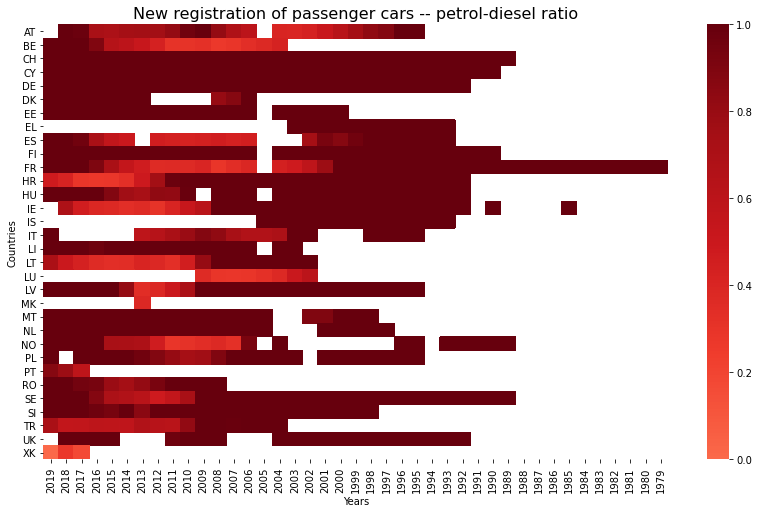

In [23]:


plt.figure(figsize=(14, 8))
sns.heatmap(data=veh_allEngine_petrol_diesel_ratio_dropped, annot=False, center=0, linewidths=.0, cmap='Reds', vmin=0, vmax=1)
plt.xlabel('Years')
plt.ylabel('Countries')
plt.title('New registration of passenger cars -- petrol-diesel ratio', fontsize=16)

Text(0.5, 1.0, 'New registration of passenger cars -- petrol-diesel ratio')

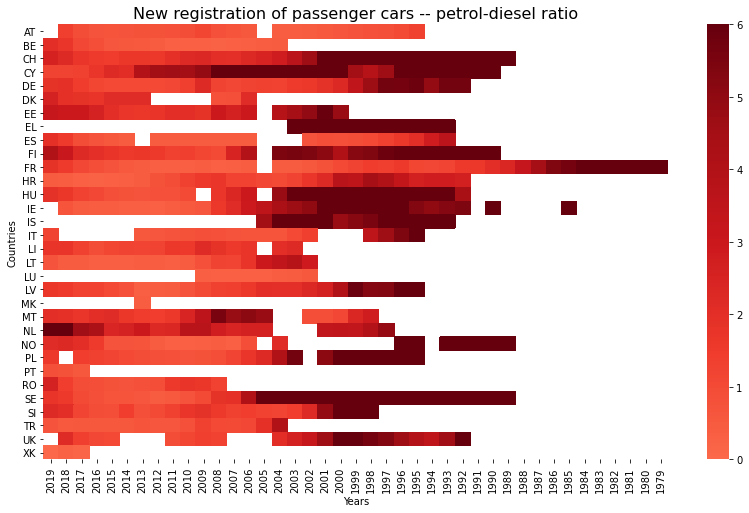

In [24]:
plt.figure(figsize=(14, 8))
sns.heatmap(data=veh_allEngine_petrol_diesel_ratio_dropped, annot=False, center=0, linewidths=.0, cmap='Reds', vmin=0, vmax=6)
plt.xlabel('Years')
plt.ylabel('Countries')
plt.title('New registration of passenger cars -- petrol-diesel ratio', fontsize=16)

## show lineplots for 3rd question: Which engine sizes are the most popular for both diesel and petrol cars?

In [25]:
vehicle_reg_es=vehicle_reg[vehicle_reg['geo\\time']=='ES']
vehicle_reg_it= vehicle_reg[vehicle_reg['geo\\time']=='IT']
vehicle_reg_ger= vehicle_reg[vehicle_reg['geo\\time']=='DE']
vehicle_reg_fin= vehicle_reg[vehicle_reg['geo\\time']=='FI']

In [26]:
vehicle_reg_es_die=vehicle_reg_es[vehicle_reg_es["mot_nrg"]=='DIE']
vehicle_reg_it_die=vehicle_reg_it[vehicle_reg_it["mot_nrg"]=='DIE']
vehicle_reg_ger_die=vehicle_reg_ger[vehicle_reg_ger["mot_nrg"]=='DIE']
vehicle_reg_fin_die=vehicle_reg_fin[vehicle_reg_fin["mot_nrg"]=='DIE']

In [27]:
vehicle_reg_es_pet=vehicle_reg_es[vehicle_reg_es["mot_nrg"]=='PET']
vehicle_reg_it_pet=vehicle_reg_it[vehicle_reg_it["mot_nrg"]=='PET']
vehicle_reg_ger_pet=vehicle_reg_ger[vehicle_reg_ger["mot_nrg"]=='PET']
vehicle_reg_fin_pet=vehicle_reg_fin[vehicle_reg_fin["mot_nrg"]=='PET']

### save dataframes in interest in two lists: diesels and petrols for plots

In [28]:
vehicle_reg_es_die_droped=vehicle_reg_es_die.dropna(axis=1, how='all')
vehicle_reg_it_die_droped=vehicle_reg_it_die.dropna(axis=1, how='all')
vehicle_reg_ger_die_droped=vehicle_reg_ger_die.dropna(axis=1, how='all')
vehicle_reg_fin_die_droped=vehicle_reg_fin_die.dropna(axis=1, how='all')

diesels = []
diesels.append(vehicle_reg_it_die_droped)
diesels.append(vehicle_reg_ger_die_droped)
diesels.append(vehicle_reg_fin_die_droped)


In [29]:
vehicle_reg_es_pet_droped=vehicle_reg_es_pet.dropna(axis=1, how='all')
vehicle_reg_it_pet_droped=vehicle_reg_it_pet.dropna(axis=1, how='all')
vehicle_reg_ger_pet_droped=vehicle_reg_ger_pet.dropna(axis=1, how='all')
vehicle_reg_fin_pet_droped=vehicle_reg_fin_pet.dropna(axis=1, how='all')

petrols = []
petrols.append(vehicle_reg_it_pet_droped)
petrols.append(vehicle_reg_ger_pet_droped)
petrols.append(vehicle_reg_fin_pet_droped)


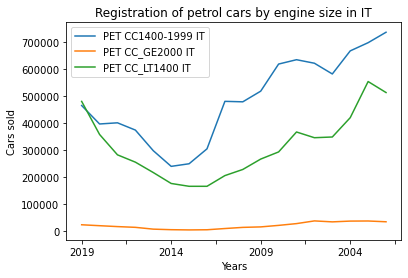

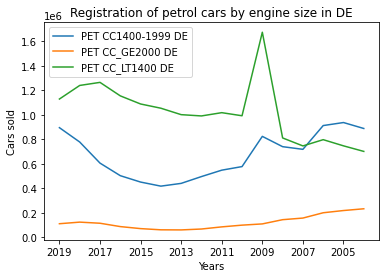

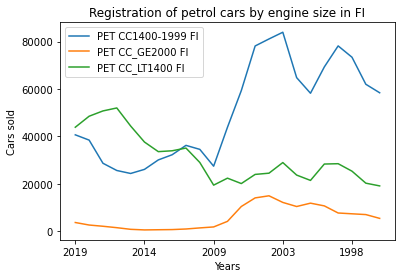

In [30]:
for pet in petrols:
    for i in range(0,len(pet)-1):
        ax=pet.iloc[i,3:].plot()
    plt.legend([str(pet.iloc[0,0])+" "+str(pet.iloc[0,1])+" "+str(pet.iloc[0,2]), str(pet.iloc[1,0])+" "+str(pet.iloc[1,1])+" "+str(pet.iloc[1,2]),str(pet.iloc[2,0])+" "+str(pet.iloc[2,1])+" "+str(pet.iloc[2,2])], loc='upper left')
    ax.set_xlabel('Years')
    ax.set_ylabel('Cars sold')
    ax.set_title('Registration of petrol cars by engine size in '+str(pet.iloc[0,2]))
    plt.show()

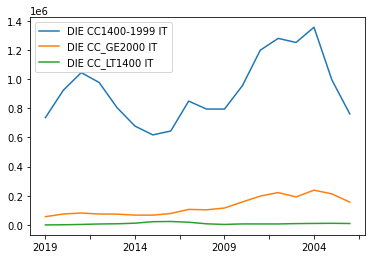

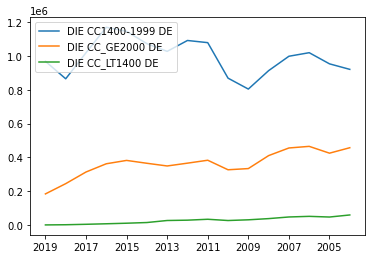

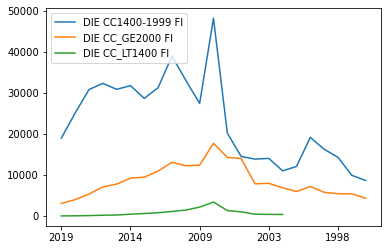

In [31]:
for die in diesels:
    for i in range(0,len(die)-1):
        die.iloc[i,3:].plot()
    plt.legend([str(die.iloc[0,0])+" "+str(die.iloc[0,1])+" "+str(die.iloc[0,2]), str(die.iloc[1,0])+" "+str(die.iloc[1,1])+" "+str(die.iloc[1,2]),str(die.iloc[2,0])+" "+str(die.iloc[2,1])+" "+str(die.iloc[2,2])], loc='upper left')
    ax.set_xlabel('Years')
    ax.set_ylabel('Cars sold')
    ax.set_title('Registration of diesel cars by engine size in '+str(pet.iloc[0,2]))
    plt.show()

## show correlation matrices for 4th question: How the number of new cars correlates to GDP?


### na_item=B1GQ --> Gross domestic product at market prices

In [32]:
countries_gdp=countries_nama[countries_nama['na_item']=='B1GQ']

In [33]:
countries_gdp

,na_item,geo\time,2021,2020,2019,2018,2017,2016,2015,2014,...,1984,1983,1982,1981,1980,1979,1978,1977,1976,1975
unit,,,,,,,,,,,,,,,,,,,,,
CLV05_MEUR,B1GQ,AT,NaN,289127.3,310004.7,305449.8,297995.1,291413.3,285728.9,282859.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CLV05_MEUR,B1GQ,BA,NaN,12200.9,12603.8,12256.8,11814.9,11451.7,11102.0,10769.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CLV05_MEUR,B1GQ,BE,NaN,359459.2,381023.8,373005.8,366341.4,360502.7,355993.4,348871.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CLV05_MEUR,B1GQ,BG,NaN,32956.3,34468.5,33130.8,32264.7,31397.4,30471.1,29461.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CLV05_MEUR,B1GQ,CH,NaN,438293.2,449037.9,443665.1,431090.6,424365.2,415860.1,409078.5,...,232992.2,226187.4,224751.1,227733.1,224143.8,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PYP_MNAC,B1GQ,SI,NaN,46349.9,47355.1,44913.5,42390.7,40092.8,38466.0,37463.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PYP_MNAC,B1GQ,SK,NaN,89948.7,91760.0,87647.0,83428.6,81431.3,80061.4,76239.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PYP_MNAC,B1GQ,TR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
countries_gdp = countries_gdp.rename_axis('unit').reset_index()

In [35]:
countries_gdp

,unit,na_item,geo\time,2021,2020,2019,2018,2017,2016,2015,...,1984,1983,1982,1981,1980,1979,1978,1977,1976,1975
0,CLV05_MEUR,B1GQ,AT,NaN,289127.3,310004.7,305449.8,297995.1,291413.3,285728.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,CLV05_MEUR,B1GQ,BA,NaN,12200.9,12603.8,12256.8,11814.9,11451.7,11102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,CLV05_MEUR,B1GQ,BE,NaN,359459.2,381023.8,373005.8,366341.4,360502.7,355993.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,CLV05_MEUR,B1GQ,BG,NaN,32956.3,34468.5,33130.8,32264.7,31397.4,30471.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,CLV05_MEUR,B1GQ,CH,NaN,438293.2,449037.9,443665.1,431090.6,424365.2,415860.1,...,232992.2,226187.4,224751.1,227733.1,224143.8,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1281,PYP_MNAC,B1GQ,SI,NaN,46349.9,47355.1,44913.5,42390.7,40092.8,38466.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1282,PYP_MNAC,B1GQ,SK,NaN,89948.7,91760.0,87647.0,83428.6,81431.3,80061.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1283,PYP_MNAC,B1GQ,TR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1284,PYP_MNAC,B1GQ,UK,NaN,NaN,2171152.0,2094670.0,2029426.0,1952705.0,1907032.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### get GDP at current price

In [36]:
countries_gdp_meuro=countries_gdp[countries_gdp['unit']=='CP_MEUR']

In [37]:
countries_gdp_meuro

,unit,na_item,geo\time,2021,2020,2019,2018,2017,2016,2015,...,1984,1983,1982,1981,1980,1979,1978,1977,1976,1975
462,CP_MEUR,B1GQ,AL,NaN,13068.9,13752.8,12828.1,11559.0,10719.9,10264.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
463,CP_MEUR,B1GQ,AT,NaN,379320.6,397518.5,385424.0,369361.9,357608.0,344269.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
464,CP_MEUR,B1GQ,BA,NaN,17506.7,18046.4,17099.7,16042.4,15289.9,14617.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
465,CP_MEUR,B1GQ,BE,NaN,456892.9,478160.7,460029.4,445050.1,430085.3,416701.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
466,CP_MEUR,B1GQ,BG,NaN,61331.0,61558.0,56224.7,52531.3,48773.1,45812.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
467,CP_MEUR,B1GQ,CH,NaN,659730.8,653732.6,622746.0,623994.0,628729.6,632770.5,...,139325.3,128959.2,117690.7,100890.1,88299.2,NaN,NaN,NaN,NaN,NaN
468,CP_MEUR,B1GQ,CY,NaN,21548.4,23009.9,21612.6,20245.3,18929.3,17884.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
469,CP_MEUR,B1GQ,CZ,NaN,215248.0,225568.7,210927.8,194132.9,177438.5,169558.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
470,CP_MEUR,B1GQ,DE,3567080.0,3367560.0,3473350.0,3367860.0,3267160.0,3134740.0,3026180.0,...,823190.6,773769.4,708094.6,642468.8,610968.0,574348.8,519503.6,470096.6,414999.5,353407.9
471,CP_MEUR,B1GQ,DK,NaN,312516.6,310475.6,302328.7,294808.2,283109.7,273017.6,...,75140.2,68200.1,61712.7,55635.8,51213.4,51359.9,47421.8,43593.7,39850.5,32652.5


In [38]:
countries_gdp_meuro_cropped=countries_gdp_meuro.iloc[:,2:]

In [39]:
countries_gdp_meuro_cropped_reindexed=countries_gdp_meuro_cropped.set_index('geo\\time')

In [40]:
countries_gdp_meuro_cropped_reindexed_transposed=countries_gdp_meuro_cropped_reindexed.transpose()

In [41]:
countries_gdp_meuro_cropped_reindexed_transposed

geo\time,AL,AT,BA,BE,BG,CH,CY,CZ,DE,DK,...,PL,PT,RO,RS,SE,SI,SK,TR,UK,XK
2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3567080.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020,13068.9,379320.6,17506.7,456892.9,61331.0,659730.8,21548.4,215248.0,3367560.0,312516.6,...,523667.8,200087.6,218863.3,46796.4,475431.5,46918.0,92079.3,626576.2,NaN,6771.6
2019,13752.8,397518.5,18046.4,478160.7,61558.0,653732.6,23009.9,225568.7,3473350.0,310475.6,...,533599.9,214374.6,223162.5,46005.4,476869.5,48396.7,94048.0,679132.2,2526615.2,7056.2
2018,12828.1,385424.0,17099.7,460029.4,56224.7,622746.0,21612.6,210927.8,3367860.0,302328.7,...,497842.3,205184.1,204496.9,42892.2,470673.1,45864.2,89430.0,658544.4,2420897.2,6671.5
2017,11559.0,369361.9,16042.4,445050.1,52531.3,623994.0,20245.3,194132.9,3267160.0,294808.2,...,467426.6,195947.2,187772.7,39235.3,480025.5,43011.3,84442.9,760497.1,2359789.9,6356.5
2016,10719.9,357608.0,15289.9,430085.3,48773.1,628729.6,18929.3,177438.5,3134740.0,283109.7,...,427091.8,186489.8,170063.4,36779.3,466266.5,40443.2,81014.3,785618.9,2434119.2,6037.3
2015,10264.1,344269.2,14617.4,416701.4,45812.3,632770.5,17884.0,169558.2,3026180.0,273017.6,...,430465.8,179713.2,160149.8,35740.2,455494.7,38852.6,79888.1,777042.3,2644716.5,5674.4
2014,9968.6,333146.1,13988.3,403003.3,43026.0,553942.2,17430.2,157821.3,2927430.0,265757.0,...,408967.8,173053.7,150708.6,35467.5,438833.9,37634.3,76092.7,707000.8,2311080.2,5325.1
2013,9625.4,323910.2,13691.8,392880.0,42050.2,536632.9,17995.0,159461.5,2811350.0,258742.7,...,392310.7,170492.3,143690.4,36426.7,441850.7,36454.3,74217.3,719726.6,2096338.0,5071.3
2012,9585.8,318653.0,13407.5,386174.7,42256.8,538439.0,19440.8,162587.5,2745310.0,254578.0,...,387947.0,168295.6,132711.2,33679.3,430037.1,36253.3,73360.8,683587.3,2111028.9,4797.3


### Exclude columns that are summarizing GDPs

In [42]:
countries_gdp_meuro_cropped_reindexed_transposed=countries_gdp_meuro_cropped_reindexed_transposed.drop(columns=['EU27_2020', 'EU28','EU15','EA','EA19','EA12'])

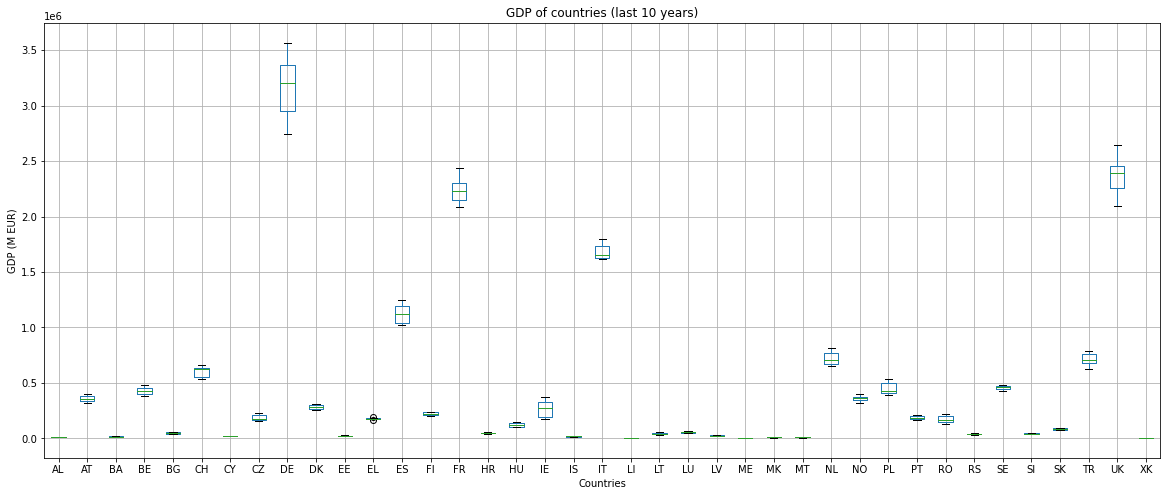

In [43]:
plt.figure(figsize=(20, 8))
ax=countries_gdp_meuro_cropped_reindexed_transposed.iloc[:10,:].boxplot(column=countries_gdp_meuro_cropped_reindexed_transposed.columns.tolist())
plt.title('GDP of countries (last 10 years)')
ax.set_ylabel('GDP (M EUR)')
ax.set_xlabel('Countries')
plt.show()

In [44]:
countries_gdp_meuro_cropped_reindexed_transposed_DE = countries_gdp_meuro_cropped_reindexed_transposed[['DE']]
countries_gdp_meuro_cropped_reindexed_transposed_IT = countries_gdp_meuro_cropped_reindexed_transposed[['IT']]
countries_gdp_meuro_cropped_reindexed_transposed_FI = countries_gdp_meuro_cropped_reindexed_transposed[['FI']]

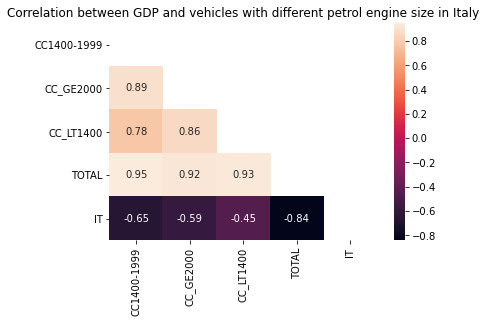

In [45]:
vehicle_reg_it_pet_droped_transposed = vehicle_reg_it_pet_droped.drop(columns=['mot_nrg','geo\\time']).set_index('engine').transpose()
vehicle_reg_it_pet_droped_transposed.reset_index(inplace=True)
countries_gdp_meuro_cropped_reindexed_transposed_IT.reset_index(inplace=True)
merged_vehicle_gdp_IT = vehicle_reg_it_pet_droped_transposed.merge(countries_gdp_meuro_cropped_reindexed_transposed_IT,on='index')
merged_vehicle_gdp_IT_corr=merged_vehicle_gdp_IT.corr()
matrix = np.triu(merged_vehicle_gdp_IT_corr)
ax=sns.heatmap(merged_vehicle_gdp_IT_corr, annot=True, mask=matrix)
plt.title('Correlation between GDP and vehicles with different petrol engine size in Italy')
plt.show()

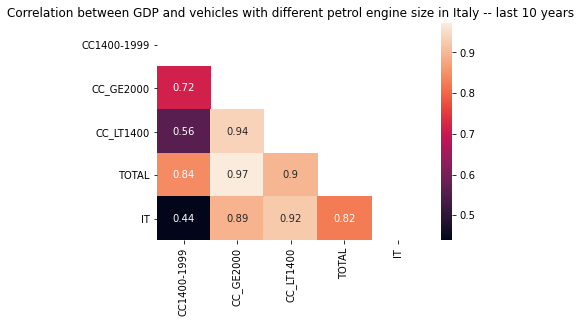

In [46]:

vehicle_reg_it_pet_droped_transposed_first10=vehicle_reg_it_pet_droped_transposed.iloc[:10,:]
merged_vehicle_gdp_IT = vehicle_reg_it_pet_droped_transposed_first10.merge(countries_gdp_meuro_cropped_reindexed_transposed_IT,on='index')
merged_vehicle_gdp_IT_corr=merged_vehicle_gdp_IT.corr()
matrix = np.triu(merged_vehicle_gdp_IT_corr)
ax=sns.heatmap(merged_vehicle_gdp_IT_corr, annot=True, mask=matrix)
plt.title('Correlation between GDP and vehicles with different petrol engine size in Italy -- last 10 years')
plt.show()

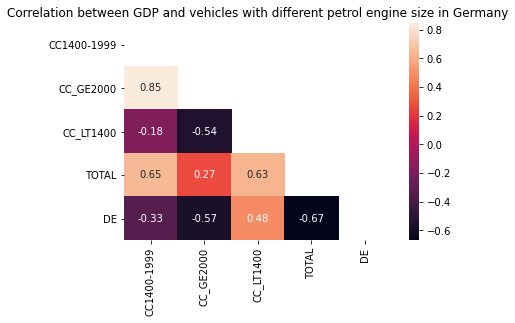

In [47]:
vehicle_reg_ger_pet_droped_transposed = vehicle_reg_ger_pet_droped.drop(columns=['mot_nrg','geo\\time']).set_index('engine').transpose()
vehicle_reg_ger_pet_droped_transposed.reset_index(inplace=True)
countries_gdp_meuro_cropped_reindexed_transposed_DE.reset_index(inplace=True)
merged_vehicle_gdp_DE = vehicle_reg_ger_pet_droped_transposed.merge(countries_gdp_meuro_cropped_reindexed_transposed_DE,on='index')
merged_vehicle_gdp_DE_corr=merged_vehicle_gdp_DE.corr()
matrix = np.triu(merged_vehicle_gdp_DE_corr)
sns.heatmap(merged_vehicle_gdp_DE_corr, annot=True, mask=matrix)
plt.title('Correlation between GDP and vehicles with different petrol engine size in Germany')
plt.show()

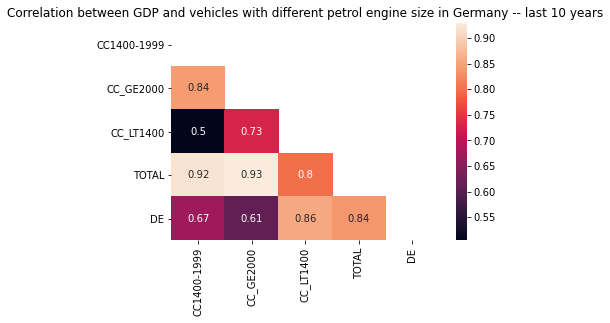

In [48]:
vehicle_reg_ger_pet_droped_transposed_first10 = vehicle_reg_ger_pet_droped_transposed.iloc[:10,:]
merged_vehicle_gdp_DE = vehicle_reg_ger_pet_droped_transposed_first10.merge(countries_gdp_meuro_cropped_reindexed_transposed_DE,on='index')
merged_vehicle_gdp_DE_corr=merged_vehicle_gdp_DE.corr()
matrix = np.triu(merged_vehicle_gdp_DE_corr)
sns.heatmap(merged_vehicle_gdp_DE_corr, annot=True, mask=matrix)
plt.title('Correlation between GDP and vehicles with different petrol engine size in Germany -- last 10 years')
plt.show()

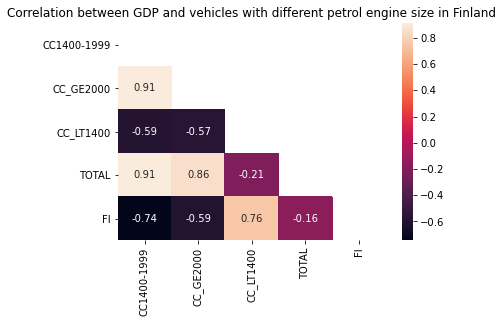

In [49]:
vehicle_reg_fin_pet_droped_transposed = vehicle_reg_fin_pet_droped.drop(columns=['mot_nrg','geo\\time']).set_index('engine').transpose()
vehicle_reg_fin_pet_droped_transposed.reset_index(inplace=True)
countries_gdp_meuro_cropped_reindexed_transposed_FI.reset_index(inplace=True)
merged_vehicle_gdp_FI = vehicle_reg_fin_pet_droped_transposed.merge(countries_gdp_meuro_cropped_reindexed_transposed_FI,on='index')
merged_vehicle_gdp_FI_corr=merged_vehicle_gdp_FI.corr()
matrix = np.triu(merged_vehicle_gdp_FI_corr)
sns.heatmap(merged_vehicle_gdp_FI_corr, annot=True, mask=matrix)
plt.title('Correlation between GDP and vehicles with different petrol engine size in Finland')
plt.show()

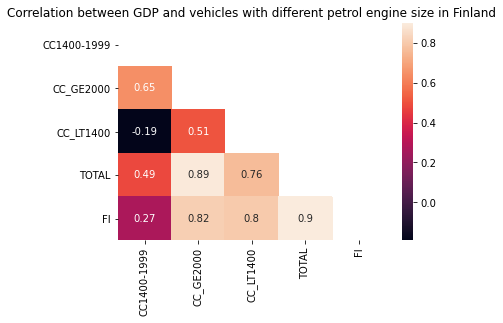

In [50]:
vehicle_reg_fin_pet_droped_transposed_first10 = vehicle_reg_fin_pet_droped_transposed.iloc[:10,:]
merged_vehicle_gdp_FI = vehicle_reg_fin_pet_droped_transposed_first10.merge(countries_gdp_meuro_cropped_reindexed_transposed_FI,on='index')
merged_vehicle_gdp_FI_corr=merged_vehicle_gdp_FI.corr()
matrix = np.triu(merged_vehicle_gdp_FI_corr)
sns.heatmap(merged_vehicle_gdp_FI_corr, annot=True, mask=matrix)
plt.title('Correlation between GDP and vehicles with different petrol engine size in Finland')
plt.show()

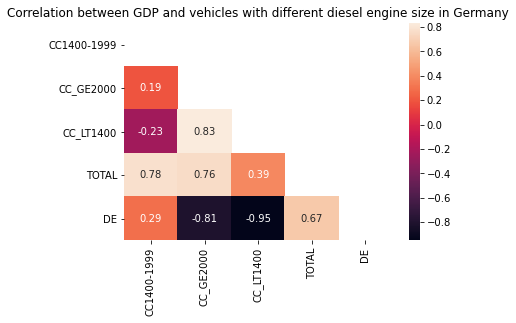

In [51]:
vehicle_reg_ger_die_droped_transposed = vehicle_reg_ger_die_droped.drop(columns=['mot_nrg','geo\\time']).set_index('engine').transpose()
vehicle_reg_ger_die_droped_transposed.reset_index(inplace=True)
merged_vehicle_gdp_DE = vehicle_reg_ger_die_droped_transposed.merge(countries_gdp_meuro_cropped_reindexed_transposed_DE,on='index')
merged_vehicle_gdp_DE_corr=merged_vehicle_gdp_DE.corr()
matrix = np.triu(merged_vehicle_gdp_DE_corr)
sns.heatmap(merged_vehicle_gdp_DE_corr, annot=True, mask=matrix)
plt.title('Correlation between GDP and vehicles with different diesel engine size in Germany')
plt.show()

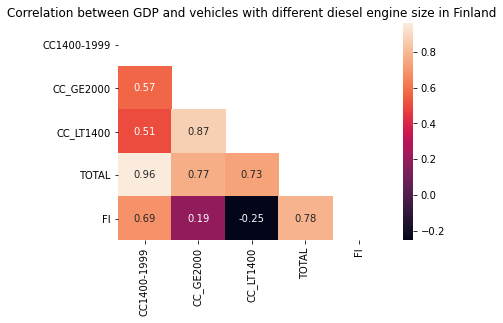

In [52]:
vehicle_reg_fin_die_droped_transposed = vehicle_reg_fin_die_droped.drop(columns=['mot_nrg','geo\\time']).set_index('engine').transpose()
vehicle_reg_fin_die_droped_transposed.reset_index(inplace=True)
merged_vehicle_gdp_FI = vehicle_reg_fin_die_droped_transposed.merge(countries_gdp_meuro_cropped_reindexed_transposed_FI,on='index')
merged_vehicle_gdp_FI_corr=merged_vehicle_gdp_FI.corr()
matrix = np.triu(merged_vehicle_gdp_FI_corr)
sns.heatmap(merged_vehicle_gdp_FI_corr, annot=True, mask=matrix)
plt.title('Correlation between GDP and vehicles with different diesel engine size in Finland')
plt.show()

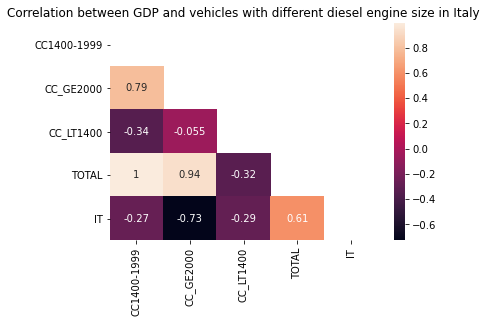

In [53]:
vehicle_reg_it_die_droped_transposed = vehicle_reg_it_die_droped.drop(columns=['mot_nrg','geo\\time']).set_index('engine').transpose()
vehicle_reg_it_die_droped_transposed.reset_index(inplace=True)
merged_vehicle_gdp_IT = vehicle_reg_it_die_droped_transposed.merge(countries_gdp_meuro_cropped_reindexed_transposed_IT,on='index')
merged_vehicle_gdp_IT_corr=merged_vehicle_gdp_IT.corr()
matrix = np.triu(merged_vehicle_gdp_IT_corr)
ax=sns.heatmap(merged_vehicle_gdp_IT_corr, annot=True, mask=matrix)
plt.title('Correlation between GDP and vehicles with different diesel engine size in Italy')
plt.show()

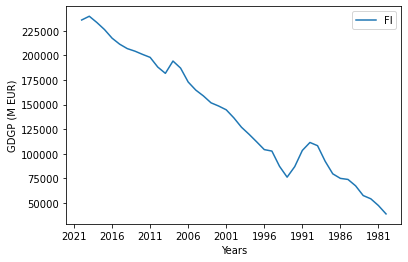

In [54]:
ax=countries_gdp_meuro_cropped_reindexed_transposed_FI.plot(x='index',y="FI")
ax.set_xlabel('Years')
ax.set_ylabel('GDGP (M EUR)')
plt.show()

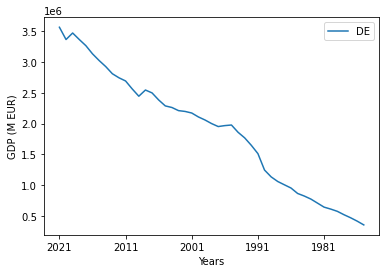

In [55]:
ax=countries_gdp_meuro_cropped_reindexed_transposed_DE.plot(x='index',y="DE")
ax.set_xlabel('Years')
ax.set_ylabel('GDP (M EUR)')
plt.show()

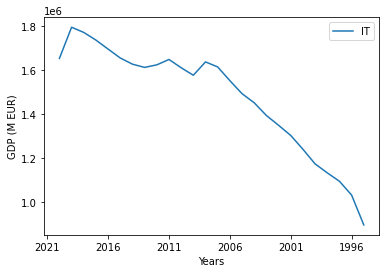

In [56]:
ax=countries_gdp_meuro_cropped_reindexed_transposed_IT.plot(x='index',y="IT")
ax.set_xlabel('Years')
ax.set_ylabel('GDP (M EUR)')
plt.show()

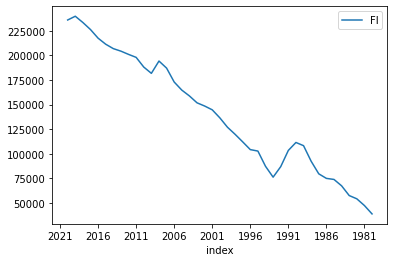

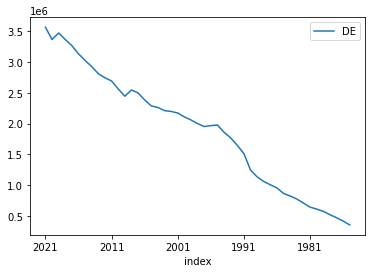

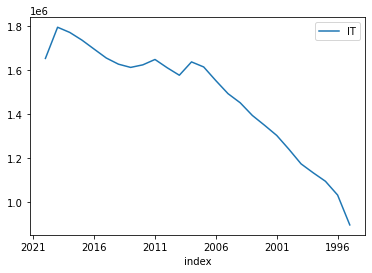

In [57]:
countries_gdp_meuro_cropped_reindexed_transposed_FI.plot(x='index',y="FI")
countries_gdp_meuro_cropped_reindexed_transposed_DE.plot(x='index',y="DE")
countries_gdp_meuro_cropped_reindexed_transposed_IT.plot(x='index',y="IT")
plt.show()


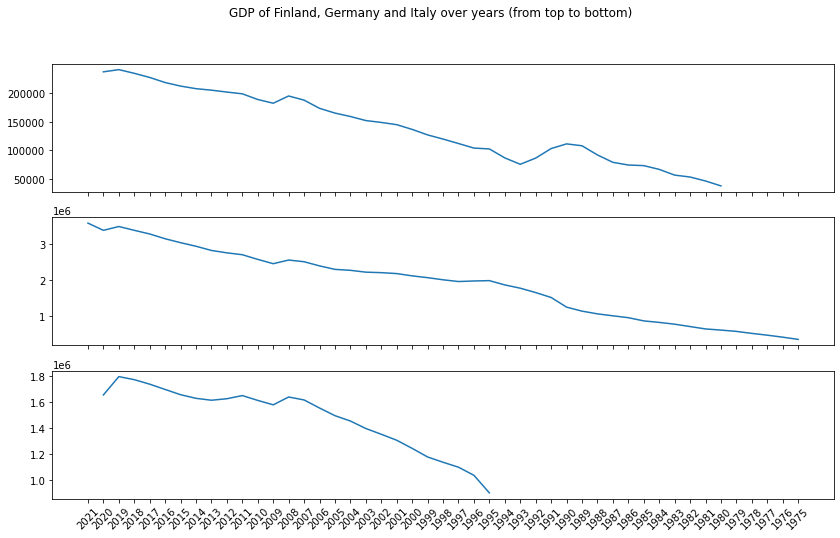

In [58]:
fig, axs = plt.subplots(3,sharex=True,figsize=(14, 8));
fig.suptitle('GDP of Finland, Germany and Italy over years (from top to bottom)');
axs[0].plot(countries_gdp_meuro_cropped_reindexed_transposed_FI['index'],countries_gdp_meuro_cropped_reindexed_transposed_FI["FI"])
axs[1].plot(countries_gdp_meuro_cropped_reindexed_transposed_DE['index'],countries_gdp_meuro_cropped_reindexed_transposed_DE["DE"])
axs[2].plot(countries_gdp_meuro_cropped_reindexed_transposed_IT['index'],countries_gdp_meuro_cropped_reindexed_transposed_IT["IT"])

plt.xticks(rotation=45);


# Communicate your business insights

### We saw that selling new cars in European countries change dynamically depending on the economic situation.
### Diesel passenger cars were very popular in many countries from the early 2000's until circa 2014/2015. 
### After that in almost all countries petrol cars gained back its priority 
### (also hybrid and electric cars started to be sold significantly everywhere).
### In Italy, Germany and Finland the number of new petrol cars with engine size between 1400–1999 cc are rising rapidly. 
### In Finland petrol cars with large engines (above 2000 cc) are also getting more and more popular.
### New car registration has strong positive correlation with GDP.